In [1]:
import time

import numpy as np
from tensorly import cp_to_tensor
from tensorly.decomposition import parafac
from tensorly.metrics import RMSE
import matplotlib.pyplot as plt

cp rank: 1 -- 0.0242 seconds
cp rank: 2 -- 0.1445 seconds
cp rank: 3 -- 0.1667 seconds
cp rank: 4 -- 0.2037 seconds
cp rank: 5 -- 0.2273 seconds


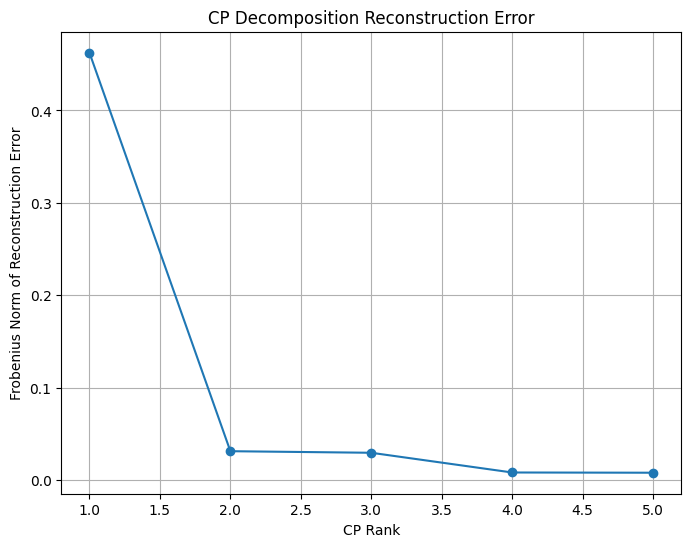

In [2]:
def create_tensor(func, value_range, dimensions):
    """
    Create a tensor by evaluating a function over a specified integer range.
    
    Parameters:
    - func: Callable, the function to evaluate at each point.
    - value_range: np.array, the range of integer values for each dimension.
    - dimensions: int, number of dimensions in the tensor.

    Returns:
    - np.array: The resulting tensor filled with function evaluations.
    """
    # Generate indices for all possible combinations in the specified dimension space
    indices = np.array(np.meshgrid(*[value_range]*dimensions, indexing='ij'))
    # Initialize an empty tensor with the shape (len(value_range),) * dimensions
    tensor_shape = (len(value_range),) * dimensions
    tensor = np.empty(tensor_shape)

    # Fill the tensor with function evaluations
    it = np.nditer(tensor, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        # Extract the specific input vector from indices and evaluate the function
        x = indices[(slice(None),) + it.multi_index].flatten()
        tensor[it.multi_index] = func(x)
        it.iternext()

    return tensor

def compute_cp_decomposition_errors(tensor, max_rank=5):
    """
    Perform CP decomposition on a tensor for different ranks and compute reconstruction errors.
    
    Parameters:
    - tensor: np.array, the input tensor to decompose.
    - max_rank: int, the maximum CP rank to test.
    
    Returns:
    - list of float: Reconstruction errors for each rank from 1 to max_rank.
    """
    errors = []
    for rank in range(1, max_rank + 1):
        start_time = time.time()  # 計測開始

        # Perform CP decomposition
        factors = parafac(tensor, rank=rank)
        
        # 計測終了
        end_time = time.time()
        time_taken = end_time - start_time
        print(f"cp rank: {rank} -- {time_taken:.4f} seconds")

        # Reconstruct the tensor from the factors
        reconstructed_tensor = cp_to_tensor(factors)
        # Calculate the Frobenius norm of the difference between original and reconstructed tensor
        error = RMSE(tensor, reconstructed_tensor)
        errors.append(error)
    return errors

def plot_errors(errors):
    """
    Plot reconstruction errors as a function of CP rank.
    
    Parameters:
    - errors: list of float, the reconstruction errors for each rank.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(errors) + 1), errors, marker='o')
    plt.xlabel('CP Rank')
    plt.ylabel('Frobenius Norm of Reconstruction Error')
    plt.title('CP Decomposition Reconstruction Error')
    plt.grid(True)
    plt.show()

# Example usage:
value_range = np.arange(-5, 6)  # Range for each dimension [-5, 5]
dimensions = 5  # 5-dimensional tensor

# Define your function, for example, the Ackley function
def ackley(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    d = len(x)
    sum1 = -a * np.exp(-b * np.sqrt(np.sum(x ** 2) / d))
    sum2 = -np.exp(np.sum(np.cos(c * x)) / d)
    return sum1 + sum2 + a + np.exp(1)

# Create tensor
ackley_tensor = create_tensor(ackley, value_range, dimensions)
# Compute CP decomposition errors
errors = compute_cp_decomposition_errors(ackley_tensor, max_rank=5)
# Plot errors
plot_errors(errors)


# cp 分解

## Ackley

In [ ]:
# Example usage:
value_range = np.arange(-5, 6)  # Range for each dimension [-5, 5]
dimensions = 2  # 5-dimensional tensor

print(f"dimensions: {dimensions}")

def ackley(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    d = len(x)
    sum1 = -a * np.exp(-b * np.sqrt(np.sum(x ** 2) / d))
    sum2 = -np.exp(np.sum(np.cos(c * x)) / d)
    return sum1 + sum2 + a + np.exp(1)

func = ackley

# Create tensor
eval_tensor = create_tensor(func, value_range, dimensions)
# Compute CP decomposition errors
errors = compute_cp_decomposition_errors(eval_tensor, max_rank=5)
# Plot errors
plot_errors(errors)

################################################################################

# Example usage:
value_range = np.arange(-5, 6)  # Range for each dimension [-5, 5]
dimensions = 3  # 5-dimensional tensor

print(f"dimensions: {dimensions}")

# Create tensor
eval_tensor = create_tensor(func, value_range, dimensions)
# Compute CP decomposition errors
errors = compute_cp_decomposition_errors(eval_tensor, max_rank=5)
# Plot errors
plot_errors(errors)

################################################################################

# Example usage:
value_range = np.arange(-5, 6)  # Range for each dimension [-5, 5]
dimensions = 4  # 5-dimensional tensor

print(f"dimensions: {dimensions}")

# Create tensor
eval_tensor = create_tensor(func, value_range, dimensions)
# Compute CP decomposition errors
errors = compute_cp_decomposition_errors(eval_tensor, max_rank=5)
# Plot errors
plot_errors(errors)

################################################################################

# Example usage:
value_range = np.arange(-5, 6)  # Range for each dimension [-5, 5]
dimensions = 5  # 5-dimensional tensor

print(f"dimensions: {dimensions}")

# Create tensor
eval_tensor = create_tensor(func, value_range, dimensions)
# Compute CP decomposition errors
errors = compute_cp_decomposition_errors(eval_tensor, max_rank=5)
# Plot errors
plot_errors(errors)

################################################################################

# Example usage:
value_range = np.arange(-5, 6)  # Range for each dimension [-5, 5]
dimensions = 6  # 5-dimensional tensor

print(f"dimensions: {dimensions}")

# Create tensor
eval_tensor = create_tensor(func, value_range, dimensions)
# Compute CP decomposition errors
errors = compute_cp_decomposition_errors(eval_tensor, max_rank=5)
# Plot errors
plot_errors(errors)

################################################################################

# Example usage:
value_range = np.arange(-5, 6)  # Range for each dimension [-5, 5]
dimensions = 7  # 5-dimensional tensor

print(f"dimensions: {dimensions}")

# Create tensor
eval_tensor = create_tensor(func, value_range, dimensions)
# Compute CP decomposition errors
errors = compute_cp_decomposition_errors(eval_tensor, max_rank=5)
# Plot errors
plot_errors(errors)

################################################################################

# Example usage:
value_range = np.arange(-5, 6)  # Range for each dimension [-5, 5]
dimensions = 8  # 5-dimensional tensor

print(f"dimensions: {dimensions}")

# Create tensor
eval_tensor = create_tensor(func, value_range, dimensions)
# Compute CP decomposition errors
errors = compute_cp_decomposition_errors(eval_tensor, max_rank=5)
# Plot errors
plot_errors(errors)

################################################################################

# Example usage:
value_range = np.arange(-5, 6)  # Range for each dimension [-5, 5]
dimensions = 9  # 5-dimensional tensor

print(f"dimensions: {dimensions}")

# Create tensor
eval_tensor = create_tensor(func, value_range, dimensions)
# Compute CP decomposition errors
errors = compute_cp_decomposition_errors(eval_tensor, max_rank=5)
# Plot errors
plot_errors(errors)

## Sphere

In [ ]:
# Example usage:
value_range = np.arange(-5, 6)  # Range for each dimension [-5, 5]
dimensions = 2  # 5-dimensional tensor

print(f"dimensions: {dimensions}")

def sphere(x):
    """
    Computes the d-dimensional Sphere function.
    :param x: np.array, shape (d,) - point at which to evaluate the function.
    :return: float - value of the Sphere function at x.
    """
    return np.sum(x ** 2)

func = sphere

# Create tensor
eval_tensor = create_tensor(func, value_range, dimensions)
# Compute CP decomposition errors
errors = compute_cp_decomposition_errors(eval_tensor, max_rank=5)
# Plot errors
plot_errors(errors)

################################################################################

# Example usage:
value_range = np.arange(-5, 6)  # Range for each dimension [-5, 5]
dimensions = 3  # 5-dimensional tensor

print(f"dimensions: {dimensions}")

# Create tensor
eval_tensor = create_tensor(func, value_range, dimensions)
# Compute CP decomposition errors
errors = compute_cp_decomposition_errors(eval_tensor, max_rank=5)
# Plot errors
plot_errors(errors)

################################################################################

# Example usage:
value_range = np.arange(-5, 6)  # Range for each dimension [-5, 5]
dimensions = 4  # 5-dimensional tensor

print(f"dimensions: {dimensions}")

# Create tensor
eval_tensor = create_tensor(func, value_range, dimensions)
# Compute CP decomposition errors
errors = compute_cp_decomposition_errors(eval_tensor, max_rank=5)
# Plot errors
plot_errors(errors)

################################################################################

# Example usage:
value_range = np.arange(-5, 6)  # Range for each dimension [-5, 5]
dimensions = 5  # 5-dimensional tensor

print(f"dimensions: {dimensions}")

# Create tensor
eval_tensor = create_tensor(func, value_range, dimensions)
# Compute CP decomposition errors
errors = compute_cp_decomposition_errors(eval_tensor, max_rank=5)
# Plot errors
plot_errors(errors)

################################################################################

# Example usage:
value_range = np.arange(-5, 6)  # Range for each dimension [-5, 5]
dimensions = 6  # 5-dimensional tensor

print(f"dimensions: {dimensions}")

# Create tensor
eval_tensor = create_tensor(func, value_range, dimensions)
# Compute CP decomposition errors
errors = compute_cp_decomposition_errors(eval_tensor, max_rank=5)
# Plot errors
plot_errors(errors)

################################################################################

# Example usage:
value_range = np.arange(-5, 6)  # Range for each dimension [-5, 5]
dimensions = 7  # 5-dimensional tensor

print(f"dimensions: {dimensions}")

# Create tensor
eval_tensor = create_tensor(func, value_range, dimensions)
# Compute CP decomposition errors
errors = compute_cp_decomposition_errors(eval_tensor, max_rank=5)
# Plot errors
plot_errors(errors)

################################################################################

# Example usage:
value_range = np.arange(-5, 6)  # Range for each dimension [-5, 5]
dimensions = 8  # 5-dimensional tensor

print(f"dimensions: {dimensions}")

# Create tensor
eval_tensor = create_tensor(func, value_range, dimensions)
# Compute CP decomposition errors
errors = compute_cp_decomposition_errors(eval_tensor, max_rank=5)
# Plot errors
plot_errors(errors)

################################################################################

# Example usage:
value_range = np.arange(-5, 6)  # Range for each dimension [-5, 5]
dimensions = 9  # 5-dimensional tensor

print(f"dimensions: {dimensions}")

# Create tensor
eval_tensor = create_tensor(func, value_range, dimensions)
# Compute CP decomposition errors
errors = compute_cp_decomposition_errors(eval_tensor, max_rank=5)
# Plot errors
plot_errors(errors)

In [11]:
from _src import WarcraftObjective

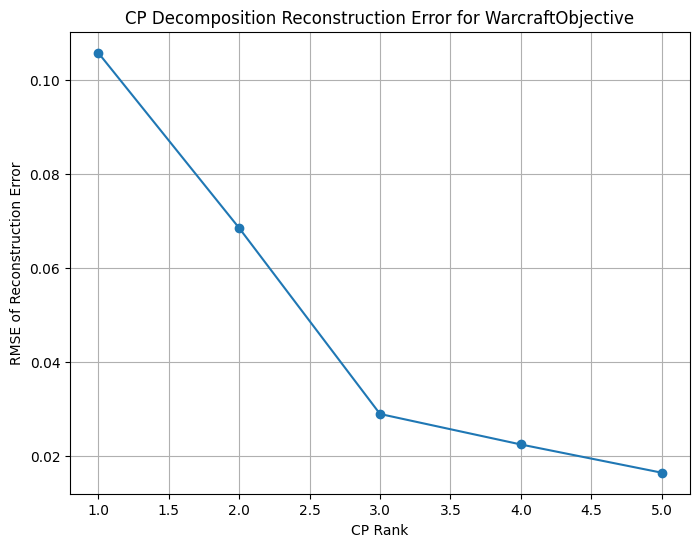

In [16]:
# Step 1: Create a tensor using WarcraftObjective
def create_warcraft_tensor(objective_function, value_range, map_shape):
    """
    Creates a tensor by evaluating the WarcraftObjective over a specified range of categorical inputs.
    
    Parameters:
    - objective_function: callable, the WarcraftObjective instance for evaluation.
    - value_range: list of categories, possible values for each cell.
    - map_shape: tuple, shape of the map for input.

    Returns:
    - np.array: Tensor filled with evaluations of the WarcraftObjective.
    """
    tensor_shape = (len(value_range),) * (map_shape[0] * map_shape[1])
    warcraft_tensor = np.empty(tensor_shape)

    # Recursive function to populate the tensor
    def fill_tensor(tensor, idx_list):
        if len(idx_list) == map_shape[0] * map_shape[1]:  # End of recursion
            # Reshape idx_list into map_shape and evaluate
            x = np.array([value_range[idx] for idx in idx_list]).reshape(map_shape)
            tensor[tuple(idx_list)] = objective_function(x)
            return
        
        for i in range(len(value_range)):
            fill_tensor(tensor, idx_list + [i])

    fill_tensor(warcraft_tensor, [])
    return warcraft_tensor


# Step 2: Perform CP decomposition and measure accuracy
def compute_cp_errors_warcraft(tensor, max_rank=5):
    """
    Perform CP decomposition on WarcraftObjective tensor and compute RMSE errors.
    
    Parameters:
    - tensor: np.array, the input tensor to decompose.
    - rank: int or tuple, if an int is given, it computes errors from rank 1 up to `rank`;
            if a tuple is given, it should be (start, end) for the rank range.

    Returns:
    - list of float: Reconstruction RMSE for each rank in the specified range.
    """
    errors = []
    
    # Determine the range of ranks based on the type of `rank` input
    if isinstance(max_rank, int):
        rank_range = range(1, max_rank + 1)
    elif isinstance(max_rank, tuple) and len(max_rank) == 2:
        rank_range = range(max_rank[0], max_rank[1] + 1)
    else:
        raise ValueError("The `rank` parameter should be either an int or a tuple of (start, end).")
    
    # Perform CP decomposition for each rank in the determined range
    for r in rank_range:
        start_time = time.time()  # 計測開始
        
        # Perform CP decomposition
        factors = parafac(tensor, rank=r)
        
        # 計測終了
        end_time = time.time()
        time_taken = end_time - start_time
        print(f"cp rank: {r} -- {time_taken:.4f} seconds")

        # Reconstruct the tensor from the factors
        reconstructed_tensor = cp_to_tensor(factors)
        # Calculate the RMSE between the original and reconstructed tensor
        error = RMSE(tensor, reconstructed_tensor)
        errors.append(error)
        
    return errors

# Step 3: Plot the errors
def plot_cp_errors(errors):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(errors) + 1), errors, marker='o')
    plt.xlabel('CP Rank')
    plt.ylabel('RMSE of Reconstruction Error')
    plt.title('CP Decomposition Reconstruction Error for WarcraftObjective')
    plt.grid(True)
    plt.show()


def get_map(map_option: int):
    """
    Return the map configuration based on the selected option.
    """
    if map_option == 1:
        map_targeted = np.array([[1, 4], [2, 1]])
    elif map_option == 2:
        map_targeted = np.array([[1, 4, 1], [2, 1, 1]])
    elif map_option == 3:
        map_targeted = np.array([[1, 4, 1], [2, 1, 3], [5, 2, 1]])
    else:
        raise ValueError(f"Invalid map option: {map_option}")

    return map_targeted / map_targeted.sum()

# Example Usage
value_range = ["oo", "ab", "ac", "ad", "bc", "bd", "cd"]
map_option = 1  # Choose the map configuration option
map_targeted = get_map(map_option)  # Get the map based on selected option
map_shape = map_targeted.shape  # Define the shape based on selected map
objective_function = WarcraftObjective(map_targeted)  # Instantiate WarcraftObjective

# Create tensor and compute CP decomposition errors
warcraft_tensor = create_warcraft_tensor(objective_function, value_range, map_shape)
errors = compute_cp_errors_warcraft(warcraft_tensor, max_rank=5)
plot_cp_errors(errors)


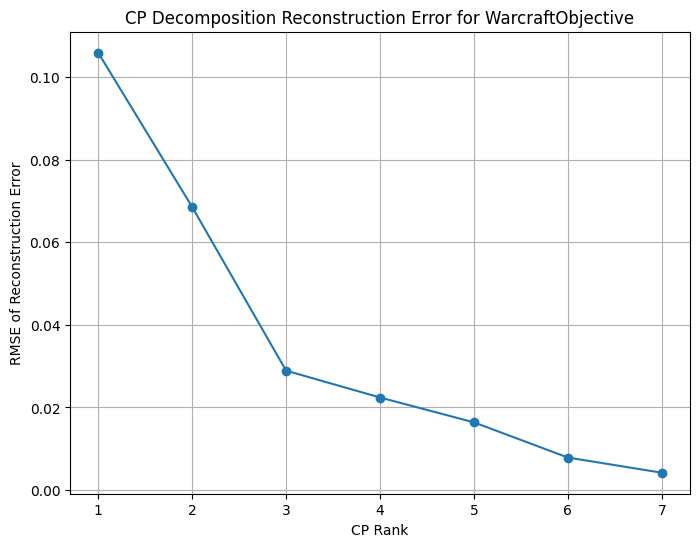

In [22]:
"""
2 x 2 マス
"""

print(f"dimensions: 2 x 2 = 4")

# Example Usage
value_range = ["oo", "ab", "ac", "ad", "bc", "bd", "cd"]
map_option = 1  # Choose the map configuration option
map_targeted = get_map(map_option)  # Get the map based on selected option
map_shape = map_targeted.shape  # Define the shape based on selected map
objective_function = WarcraftObjective(map_targeted)  # Instantiate WarcraftObjective

# Create tensor and compute CP decomposition errors
warcraft_tensor = create_warcraft_tensor(objective_function, value_range, map_shape)
errors = compute_cp_errors_warcraft(warcraft_tensor, max_rank=7)
plot_cp_errors(errors)


"""
2 x 3 マス
"""

print(f"dimensions: 2 x 3 = 6")

# Example Usage
value_range = ["oo", "ab", "ac", "ad", "bc", "bd", "cd"]
map_option = 2  # Choose the map configuration option
map_targeted = get_map(map_option)  # Get the map based on selected option
map_shape = map_targeted.shape  # Define the shape based on selected map
objective_function = WarcraftObjective(map_targeted)  # Instantiate WarcraftObjective

# Create tensor and compute CP decomposition errors
warcraft_tensor = create_warcraft_tensor(objective_function, value_range, map_shape)
errors = compute_cp_errors_warcraft(warcraft_tensor, max_rank=7)
plot_cp_errors(errors)


"""
3 x 3 マス
"""

print(f"dimensions: 3 x 3 = 9")

# Example Usage
value_range = ["oo", "ab", "ac", "ad", "bc", "bd", "cd"]
map_option = 3  # Choose the map configuration option
map_targeted = get_map(map_option)  # Get the map based on selected option
map_shape = map_targeted.shape  # Define the shape based on selected map
objective_function = WarcraftObjective(map_targeted)  # Instantiate WarcraftObjective

# Create tensor and compute CP decomposition errors
warcraft_tensor = create_warcraft_tensor(objective_function, value_range, map_shape)
errors = compute_cp_errors_warcraft(warcraft_tensor, max_rank=7)
plot_cp_errors(errors)